# Analyzing the Data

Analyzing the data is crucial before data cleaning or pre-processing the data to get a rough idea of what's there in the data set.

### Importing necessary libraries

In [1]:
#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

### Importing the data repo from UCL to preprocess and checking if the data is available to print (default code)

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

### Displaying the available data in X and y

In [4]:
X #contain features

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [5]:
y # contains target

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


### Combining the feature and target data to a single column for a single dataframe

In [6]:
# Assigning X table to a different variable
df_census_data = X

# Creating a new column to bind the income column
df_census_data["target"] = y
df_census_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
### Changing the columns names before analyzing the data for the consistency

In [8]:
# Define a dictionary mapping old column names to new column names
new_column_names = {
    "workclass": "work_class",
    "education-num": "education_num",
    "marital-status":  "marital_status",
    "capital-gain": "capital_gain",
    "capital-loss": "capital_loss",
    "hours-per-week": "hours_per_week",
    "native-country": "native_country",
    "target": "income"
}

# Rename columns using the rename() method
df_census_data = df_census_data.rename(columns=new_column_names)

In [9]:
# Checking if the columns are changed properly in the data frame
df_census_data

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Checking the shape of the dataframe

In [10]:
# Checking the data frame shape
df_census_data.shape

(48842, 15)

In [11]:
# Checking what type of data is in the data frame in each column
df_census_data.dtypes

age                int64
work_class        object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

### Checking the number of null values in each column 

Checking for null values and cleaning it is important to prevent bias, maintain data intergrity and improve the model performance.

In [12]:
null_column_values = df_census_data.isnull().sum()
null_column_values

age                 0
work_class        963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

### Checking the unique data in each column and it's count

Checking the unique value in a dataset is important to get an idea about the dataset what type of variable are the in the data set you have.

In [13]:
for column in df_census_data.columns:
    unique_values = df_census_data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("Unique values in each column ->", str(np.size(unique_values)))
    print()

Unique values in column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
Unique values in each column -> 74

Unique values in column 'work_class':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
Unique values in each column -> 10

Unique values in column 'fnlwgt':
[ 77516  83311 215646 ... 173449  89686 350977]
Unique values in each column -> 28523

Unique values in column 'education':
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Unique values in each column -> 16

Unique values in column 'education_num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unique values in each column -> 16

Unique values in c

In [14]:
for column in df_census_data.columns:
    unique_values_counts = df_census_data[column].value_counts()
    print(f"Unique values and their counts in column '{column}':")
    print(unique_values_counts)
    print()

Unique values and their counts in column 'age':
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

Unique values and their counts in column 'work_class':
work_class
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Unique values and their counts in column 'fnlwgt':
fnlwgt
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
286983     1
185942     1
234220     1
214706     1
350977     1
Name: count, Length: 28523, dtype: int64

Unique values and their counts in column 'education':
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601


### Plotting the data

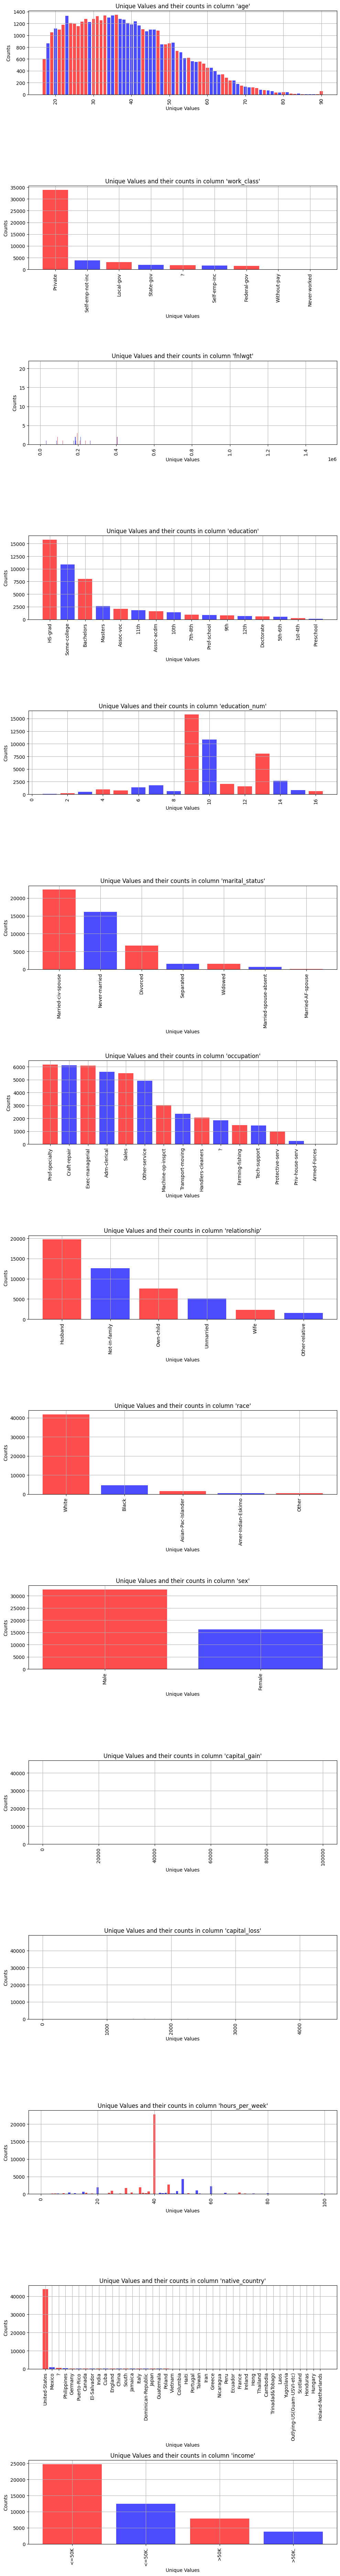

In [15]:
num_rows = len(df_census_data.columns)
# print(num_rows)
fig, axs = plt.subplots(num_rows, 1, figsize=(10, 5*num_rows))

for i, column in enumerate(df_census_data.columns):
    unique_values_counts = df_census_data[column].value_counts()
    axs[i].bar(unique_values_counts.index, unique_values_counts.values, color=["Red", "Blue"], alpha = 0.7)
    axs[i].set_title(f"Unique Values and their counts in column '{column}'")
    axs[i].set_xlabel("Unique Values")
    axs[i].set_ylabel("Counts")
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=90) 

plt.tight_layout()
plt.show()


### Describing the census data

In [16]:
df_census_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education_num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital_gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital_loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours_per_week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


### Finding co-relation of the dataframe and column

In [17]:
# Label encoding for the data frame temporarily to find the correlation between each column
from sklearn.preprocessing import LabelEncoder

# Defining categorical columns
categorical_columns = ['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

# Assigning the census data frame for another variable temporarily
temp_df = df_census_data.copy()

label_encoder = LabelEncoder()

for column in categorical_columns:
    temp_df[column] = label_encoder.fit_transform(temp_df[column]) 

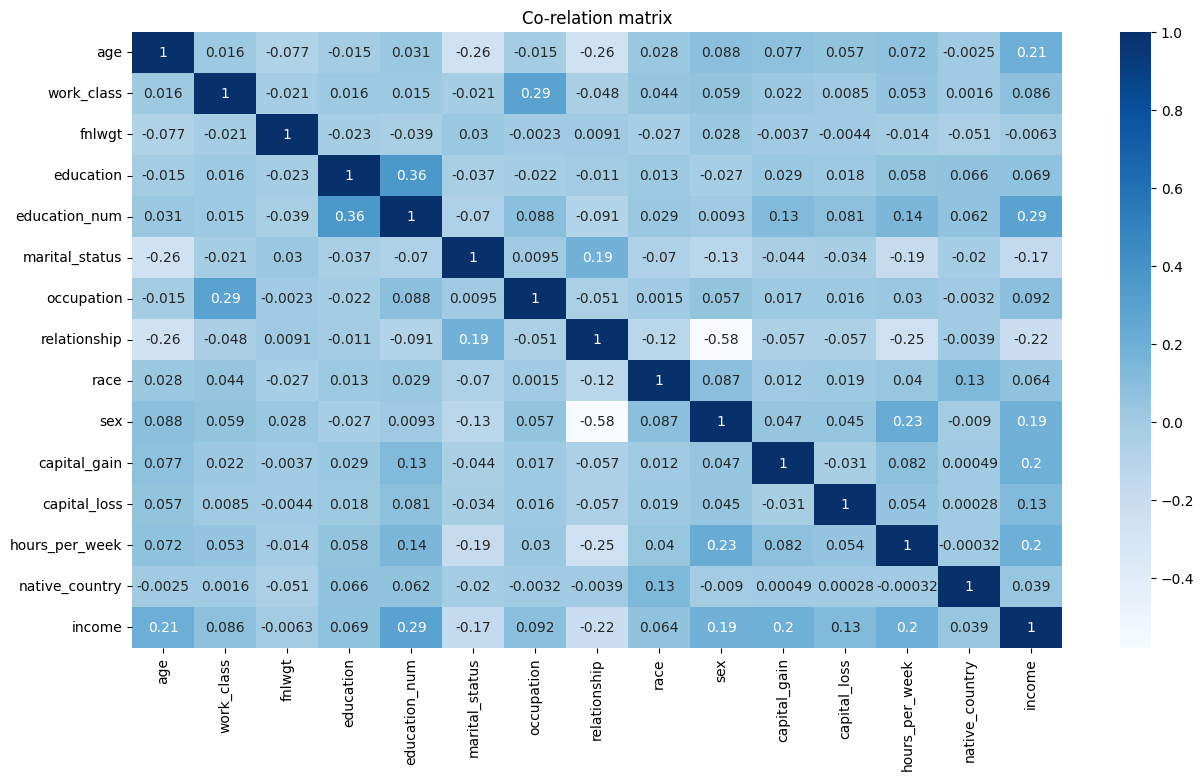

In [18]:
# Select numeric columns including the new 'Income_binary' column
# df_numerical_data = df_census_data.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(15, 8))
plt.title("Co-relation matrix")
# In here plotted the pearson co-relation because to find the linear connection between two columns 
sns.heatmap(temp_df.corr(method='pearson'), annot=True, cmap="Blues")
plt.show()

In the above co-relation matrix that mapped on a heat map show there is no strong relationship between each column with the target. For a strong co-relation to be present it should be greater than 0.65.

### Plotting against one another

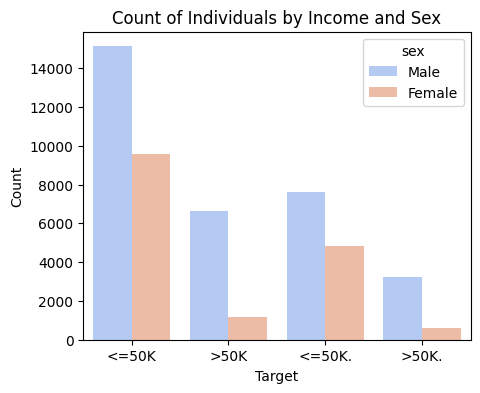

In [19]:
plt.figure(figsize=(5, 4))
sns.countplot(x="income", hue="sex", palette="coolwarm", data=df_census_data)
plt.title("Count of Individuals by Income and Sex")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


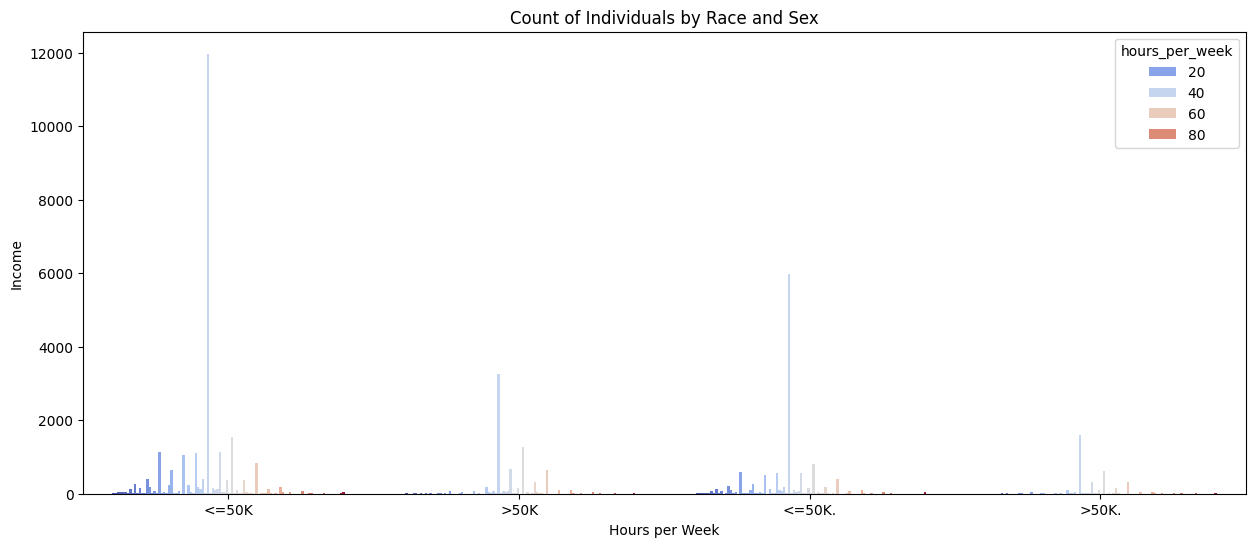

In [20]:
plt.figure(figsize=(15, 6))
sns.countplot(x="income", hue="hours_per_week", palette=("coolwarm"), data=df_census_data)
plt.title("Count of Individuals by Race and Sex")
plt.xlabel("Hours per Week")
plt.ylabel("Income")
plt.show()

### Data Cleaning

### Checking if there are duplicate rows

It's essential to check if there is duplicate data in a data repository before feeding it to a model. If there are duplicate data (here we are considering duplicate rows) it might lead to a reduction in data quality which will harm the data integrity. Also, this might increase the computational efficiency by removing duplicate datasets because it reduces the data size.

Feeding duplicate data will cause the model to overfit, biased estimation, and decrease generalization ability.

In [21]:
# Checking for duplicate data rows
df_census_data.duplicated().sum()

29

In [22]:
# Inplace true modifies the original data frame
df_census_data.drop_duplicates(inplace=True)

In [23]:
# Checking the shape of the data frame after removing the duplicate rows.
df_census_data.shape

(48813, 15)

### Manipulating the target column for correct labels

Identified that there are 4 columns in the target column of the data frame when analyzing the data where there should only 2 columns as income ">=50k" and "<50k" 

In [24]:
df_census_data.income = df_census_data.income.replace('<=50K.', "<=50K") 

In [25]:
df_census_data.income = df_census_data.income.replace('>50K.', ">50K") 

In [26]:
# Checking if there are only two target values.
df_census_data.income.unique()

array(['<=50K', '>50K'], dtype=object)

### Finding the distribution of data sets of each columns.

In [27]:
# # Dividing the data frame into two classes
# income_less_or_equal_50k = df_census_data[df_census_data['income'] == '<=50K']
# income_greater_50k = df_census_data[df_census_data['income'] == '>50K']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


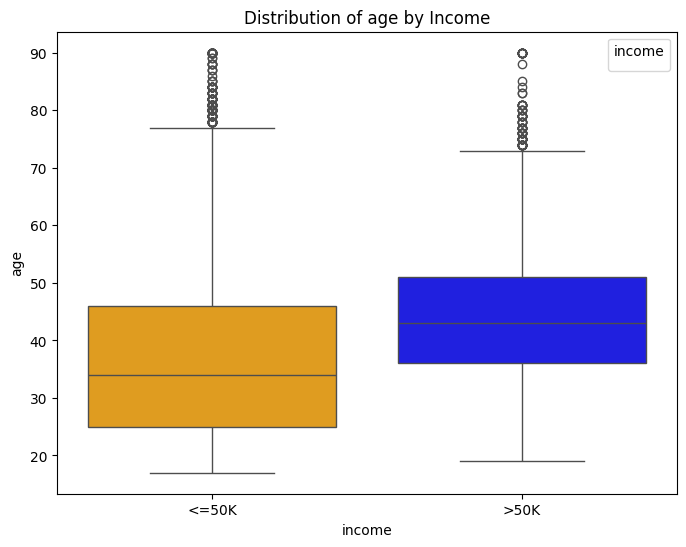

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


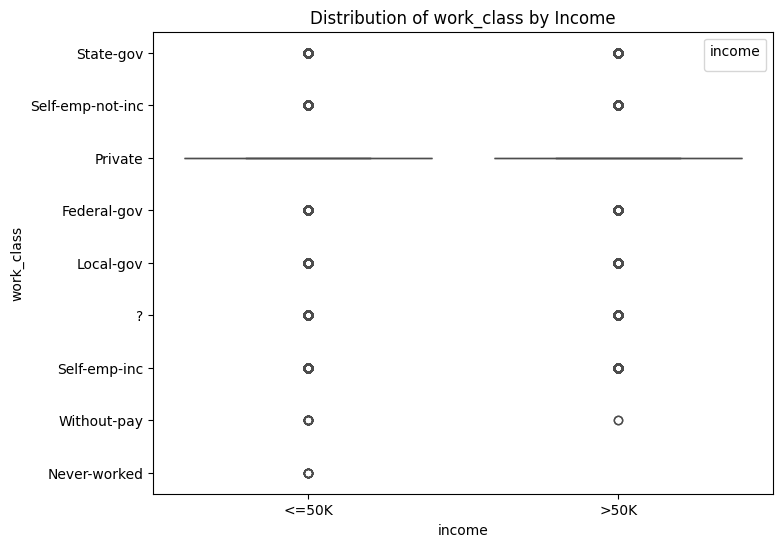

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


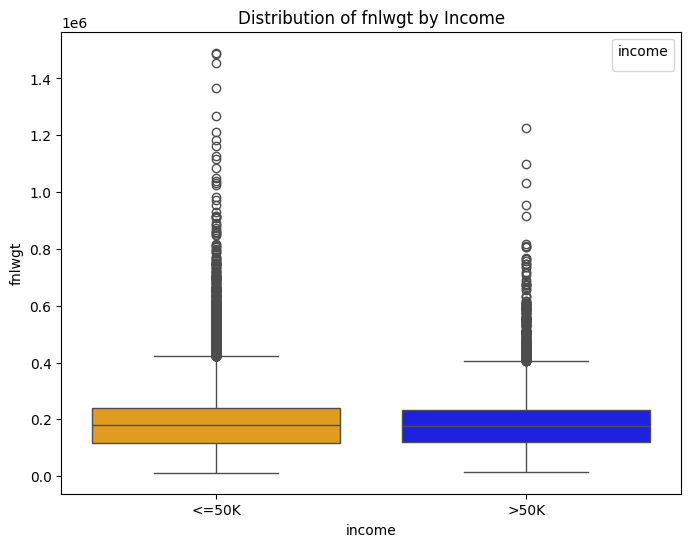

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


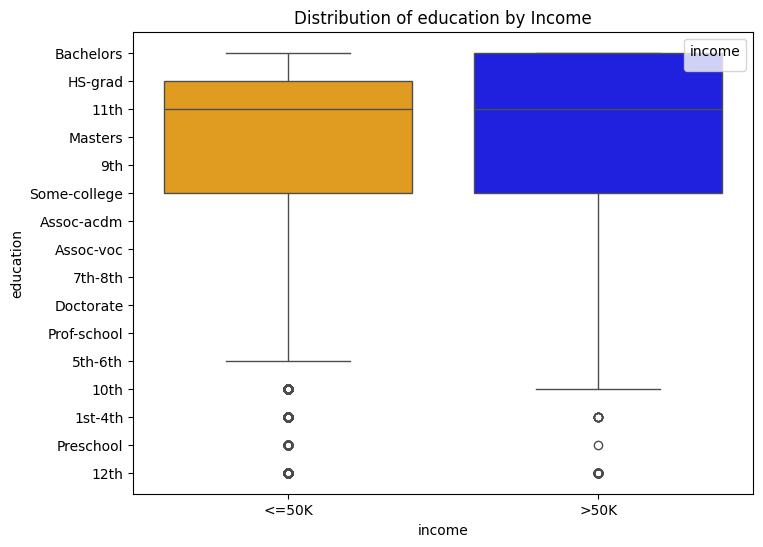

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


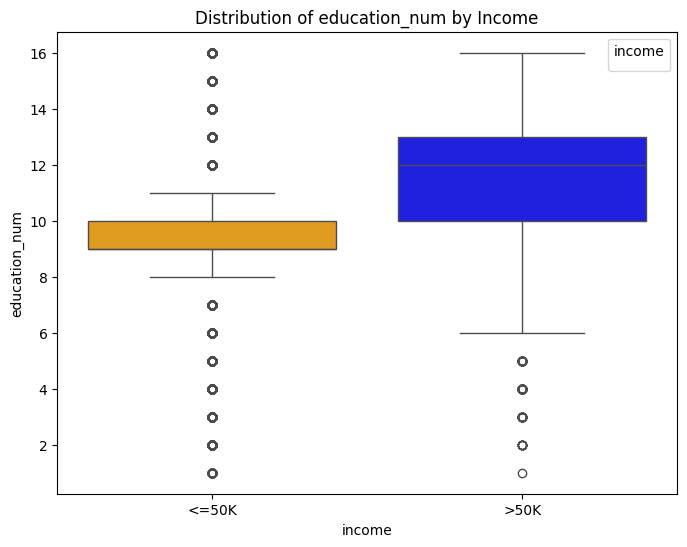

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


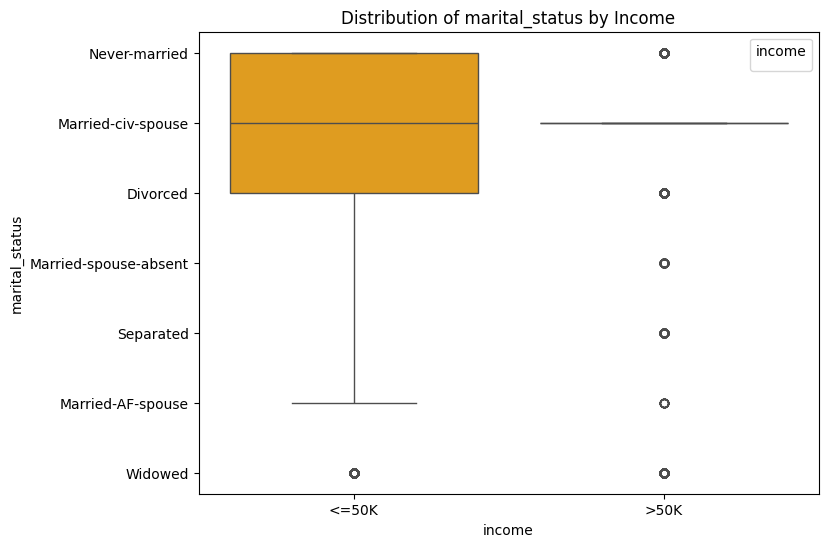

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


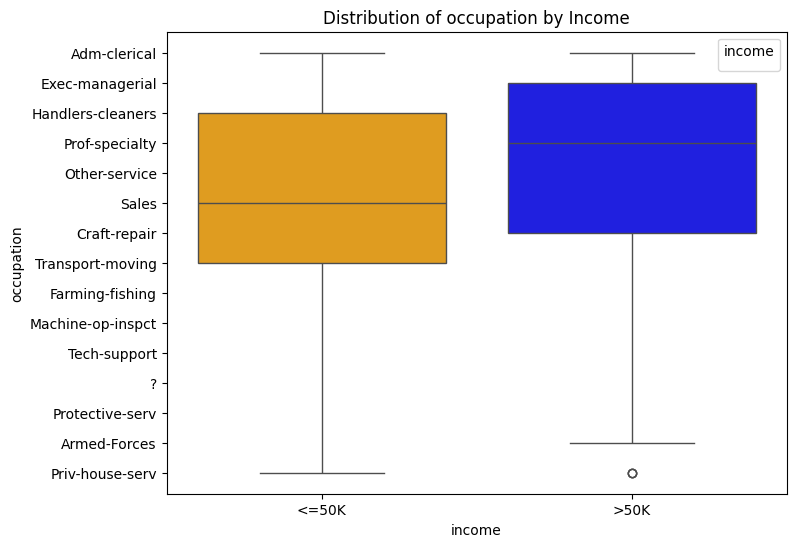

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


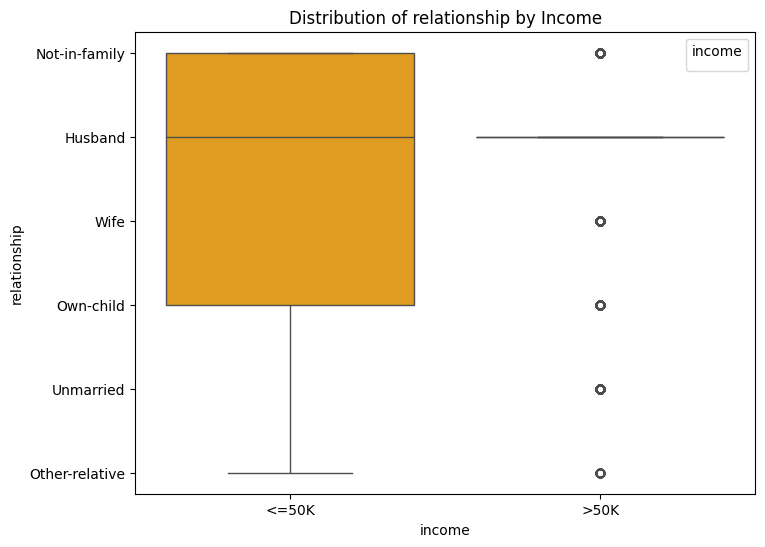

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


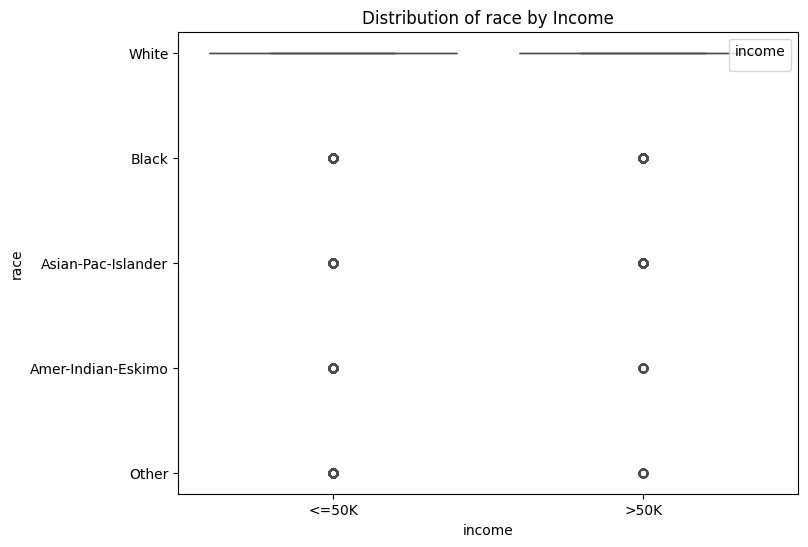

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


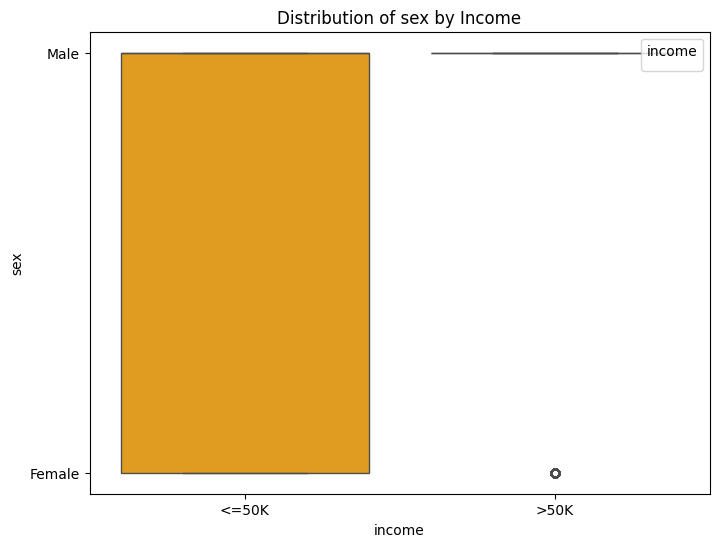

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


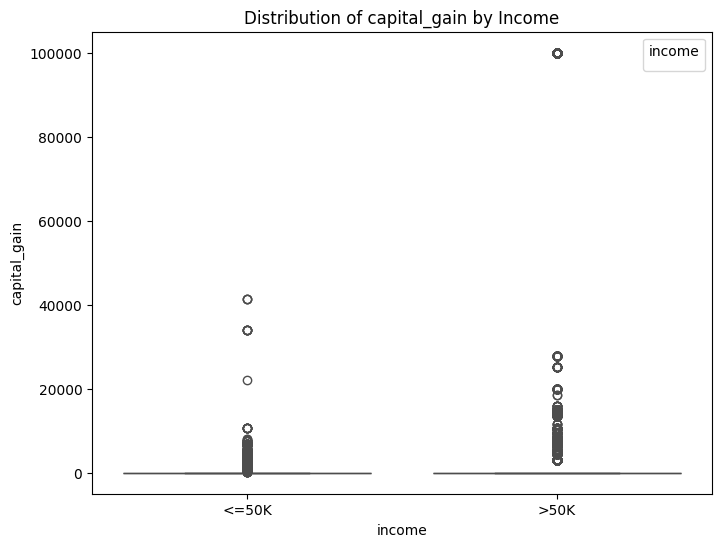

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


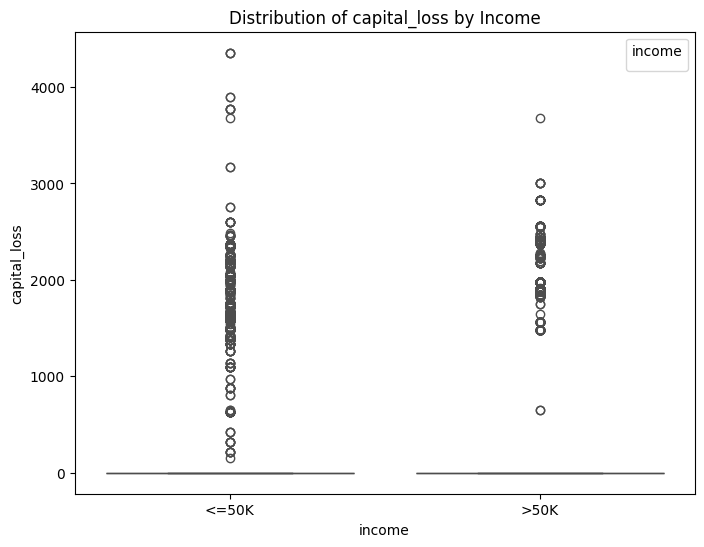

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


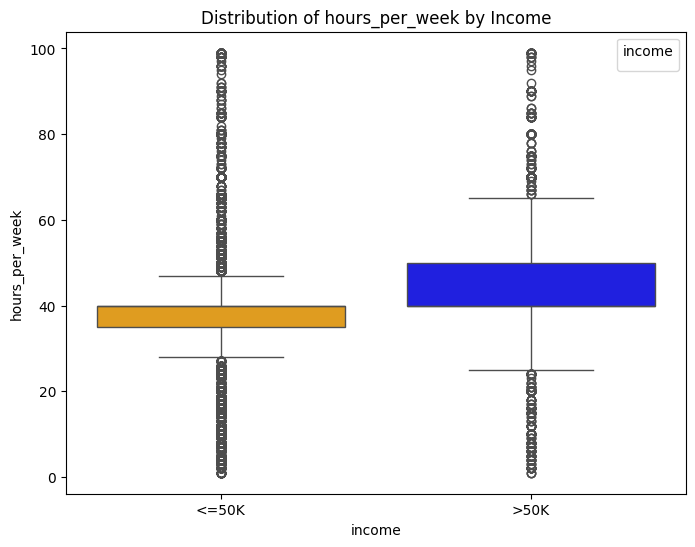

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


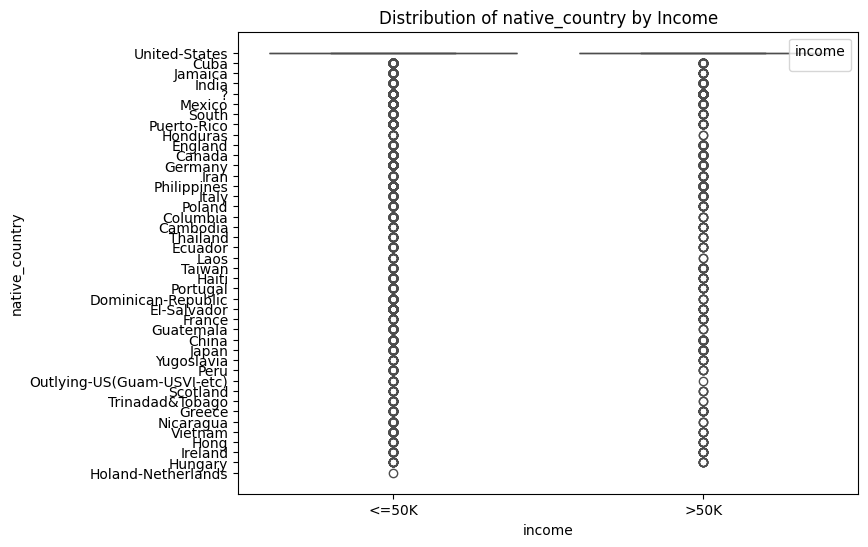

In [28]:
# Define colors for income groups
under_or_equal_50K_color = 'orange'
over_50K_color = 'blue'

# List of columns to create box plots for
columns_of_interest = ["age", "work_class", "fnlwgt", "education", "education_num", "marital_status", "occupation", 
                       "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country"]

# Create box plots for each column
for column in columns_of_interest:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_census_data[column], x=df_census_data["income"], hue=df_census_data["income"], 
                palette={'>50K': over_50K_color, '<=50K': under_or_equal_50K_color})
    plt.title(f"Distribution of {column} by Income")
    plt.ylabel(column)
    plt.xlabel("income")
    plt.legend(title='income', loc='upper right')
    plt.show()


Some of the distribution of data couldn't be well seen due to less amount of the spread of the data.

### Filling the values

#### Checking the mode of the each column in the dataframe

Filling up the null values with the mode so it can preserve the data distribution and can minimal impact in statistics. (type of Imputation)

In [29]:
df_census_data.mode()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [31]:
df_census_data["work_class"] = df_census_data["work_class"].fillna("Private")

In [32]:
df_census_data["occupation"] = df_census_data["occupation"].fillna("Prof-specialty")

In [33]:
df_census_data["native_country"] = df_census_data["native_country"].fillna("United-States")

In [34]:
# Checking if there are still null values.
df_census_data.isnull().sum()

age               0
work_class        0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

## Feature Engineering

In [39]:
df_census_data.education = df_census_data.education.replace(['Preschool', '1st-4th', '5th-6th','7th-8th', '9th', '10th', '11th', '12th'], "School")

In [40]:
df_census_data.education = df_census_data.education.replace('HS-grad', "High-school") 

### Converting the target value in the DataFrame

In [42]:
df_census_data.income = df_census_data.income.replace('<=50K', "0") # Assuming <=50K as 0 for the model input

In [43]:
df_census_data.income = df_census_data.income.replace('>50K', "1") # Assuming >50K as 1 for the model input

### Save the dataframe to a CSV file

In [44]:
df_census_data.to_csv('adult.csv', index=False)